In [4]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Heart_Disease_Dataset.csv')
# Print the shape of the data
print("Shape of the data: ", data.shape)

Shape of the data:  (1190, 12)


In [5]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the missing values count for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [6]:
# 'target' is the name of the target variable
class_balance = data['target'].value_counts()

# Print the class balance
print("Class balance:")
print(class_balance)

Class balance:
1    629
0    561
Name: target, dtype: int64


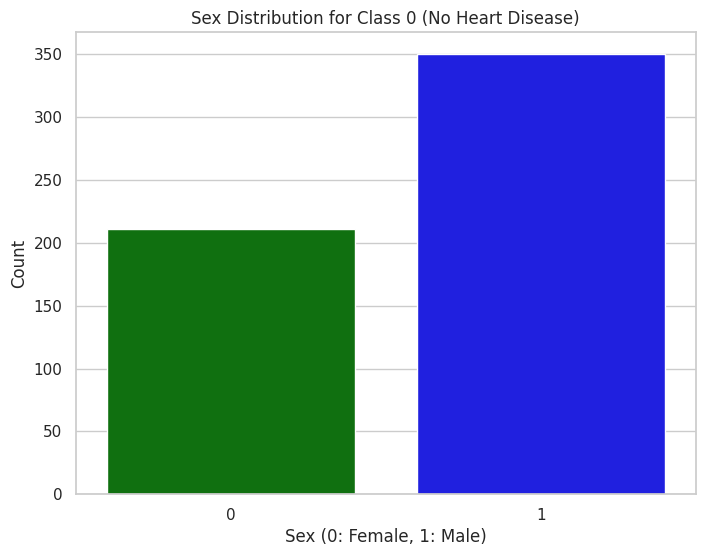

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter the data for class 0 (No Heart Disease)
no_heart_disease_data = data[data['target'] == 0]

# Plot the sex distribution for class 0 (No Heart Disease) in green
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=no_heart_disease_data, x='sex', palette=['green', 'blue'])
plt.title("Sex Distribution for Class 0 (No Heart Disease)")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()

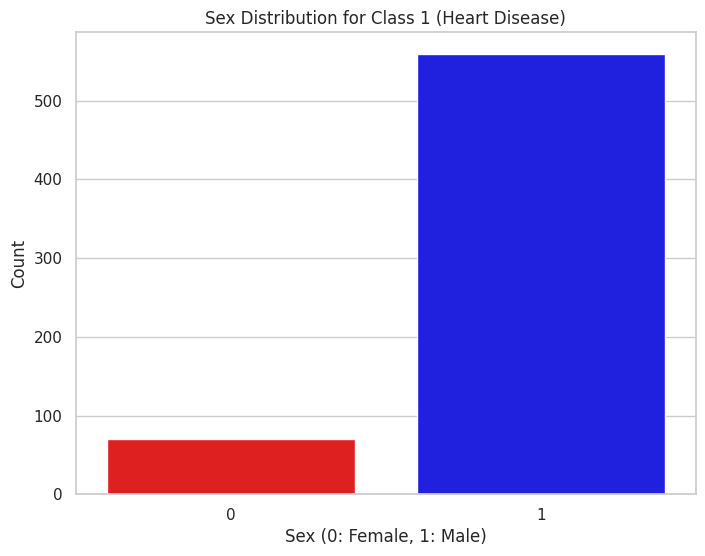

In [9]:
# Filter the data for class 1 (Heart Disease)
heart_disease_data = data[data['target'] == 1]

# Plot the sex distribution for class 1 (Heart Disease) in red
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease_data, x='sex', palette=['red', 'blue'])
plt.title("Sex Distribution for Class 1 (Heart Disease)")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()

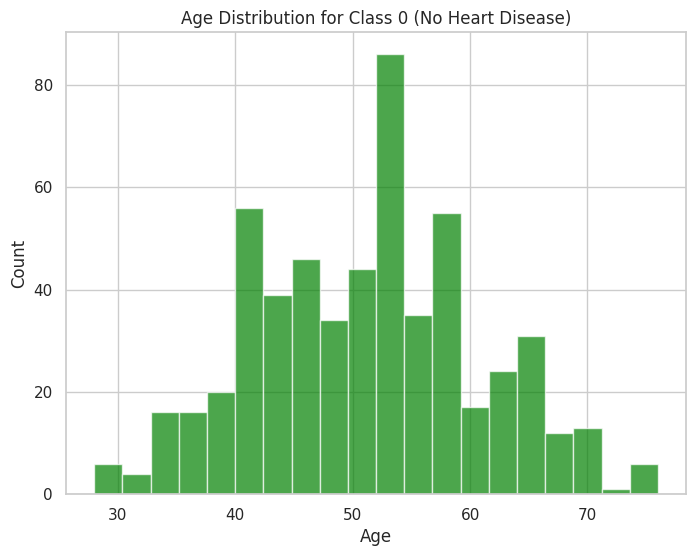

In [10]:
# Filter the data for class 0 (No Heart Disease)
no_heart_disease_data = data[data['target'] == 0]

# Plot the age distribution for class 0 (No Heart Disease) in green
plt.figure(figsize=(8, 6))
plt.hist(no_heart_disease_data['age'], bins=20, color='green', alpha=0.7)
plt.title("Age Distribution for Class 0 (No Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

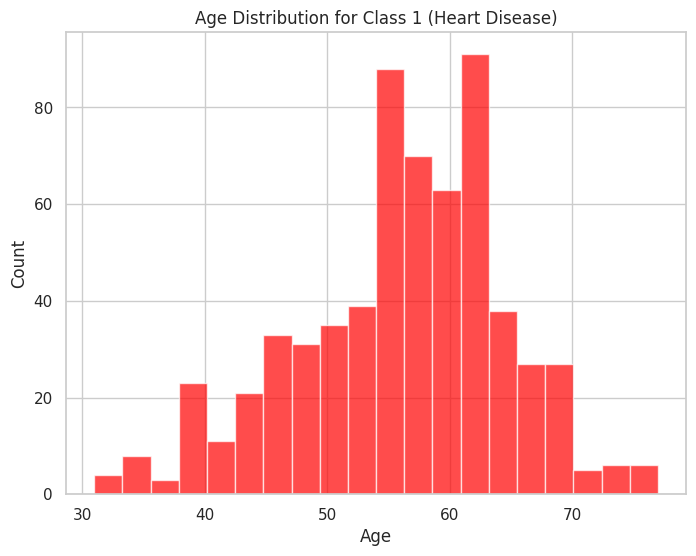

In [11]:
# Filter the data for class 1 (Heart Disease)
heart_disease_data = data[data['target'] == 1]

# Plot the age distribution for class 1 (Heart Disease) in red
plt.figure(figsize=(8, 6))
plt.hist(heart_disease_data['age'], bins=20, color='red', alpha=0.7)
plt.title("Age Distribution for Class 1 (Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [17]:
import numpy as np
from scipy.stats import zscore
# Calculate Z-scores for all data
z_scores = zscore(data)

# Set a threshold for identifying outliers
threshold = 3

# Find outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Print the outliers
print("Outliers:")
print(data[outliers])

Outliers:
      age  sex  chest pain type  resting bp s  cholesterol  \
30     53    1                3           145          518   
76     32    1                4           118          529   
109    39    1                2           190          241   
149    54    1                4           130          603   
167    50    1                4           140          231   
242    54    1                4           200          198   
325    46    1                4           100            0   
366    64    0                4           200            0   
371    60    1                4           135            0   
391    51    1                4           140            0   
400    61    1                3           200            0   
450    55    1                3             0            0   
593    61    1                4           190          287   
618    67    0                3           115          564   
704    59    1                1           178          270  

In [22]:
# Remove outliers from the dataset
data = data[~outliers]
print(data.shape)

(1162, 12)


<ipython-input-22-258bac8b2733>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~outliers]


In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Normalize numerical data and numerical columns
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
newData = data[numerical_cols] = StandardScaler().fit_transform(data[numerical_cols])

In [29]:
from sklearn.model_selection import train_test_split
# Split the data into training (70%) and testing (30%) sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, random_state=42)


In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, y_test as shown in the previous answer.

# List of kernel types to evaluate
kernels = ['linear', 'rbf', 'poly']

# Parameters for the RBF and Poly kernels
rbf_gamma = 1.5  # Set your desired gamma value for the RBF kernel
poly_degree = 5  # Set your desired degree value for the Poly kernel
rbf_C = 1.2  # Set your desired C value for the RBF kernel
# Create an empty dictionary to store the evaluation metrics for each kernel
evaluation_metrics = {}

for kernel in kernels:
    if kernel == 'rbf':
        model = SVC(kernel=kernel, gamma=rbf_gamma, C=rbf_C)
    elif kernel == 'poly':
        model = SVC(kernel=kernel, degree=poly_degree)
    else:
        model = SVC(kernel=kernel)

    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics in the dictionary
    evaluation_metrics[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the evaluation metrics for each kernel
for kernel, metrics in evaluation_metrics.items():
    print(f"Kernel: {kernel}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Kernel: linear
Accuracy: 0.7564469914040115
Precision: 0.7696629213483146
Recall: 0.7569060773480663
F1 Score: 0.7632311977715877

Kernel: rbf
Accuracy: 0.8080229226361032
Precision: 0.8202247191011236
Recall: 0.8066298342541437
F1 Score: 0.8133704735376045

Kernel: poly
Accuracy: 0.7220630372492837
Precision: 0.8620689655172413
Recall: 0.5524861878453039
F1 Score: 0.6734006734006733



In [67]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameter values to search through
param_grid = {
    'C': [0.1, 0.5, 1, 1.5, 2.5, 5, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 3]
}

# Create the SVM model with the RBF kernel
svm_rbf = SVC(kernel='rbf')

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rbf_C = grid_search.best_params_['C']
best_rbf_gamma = grid_search.best_params_['gamma']

# Create the SVM model with the best hyperparameters
best_svm_rbf = SVC(kernel='rbf', C=best_rbf_C, gamma=best_rbf_gamma)

# Fit the best model to the data
best_svm_rbf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_svm_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best RBF C: {best_rbf_C}")
print(f"Best RBF Gamma: {best_rbf_gamma}")
print(f"Accuracy with best hyperparameters: {accuracy}")


Best RBF C: 0.2
Best RBF Gamma: 1.9
Accuracy with best hyperparameters: 0.8522349570200572
